**1. Amostragem Aleatória Simples**

- Desafio: Crie um DataFrame com 1000 registros de alunos, incluindo colunas para
&quot;ID&quot;, &quot;Idade&quot; e &quot;Nota&quot;. Realize uma amostragem aleatória simples de 100 alunos e
analise a média e a mediana das notas da amostra.
- Objetivo: Praticar a amostragem e entender as medidas de tendência central.

In [ ]:
import pandas as pd
import numpy as np

notas = np.random.normal(5, 2, 1000)
alunos = pd.DataFrame({
    'ID': range(1,1001),
    'Idade': np.random.randint(18, 40, 1000),
    'Nota' : np.round(np.clip(notas, 0, 10))
})

#display(alunos)

amostra = alunos.sample(n=100, random_state=1)
display(amostra)

media_notas = amostra['Nota'].mean()
print(f"A média de notas da amostra é {media_notas}")
mediana_notas = amostra['Nota'].median()
print(f"A mediana das notas da amostra é {mediana_notas}")

,ID,Idade,Nota
507,508,30,3.0
818,819,37,8.0
452,453,23,5.0
368,369,19,2.0
242,243,30,1.0
...,...,...,...
671,672,22,8.0
559,560,22,7.0
593,594,32,5.0
258,259,32,7.0


A média de notas da amostra é 5.2
A mediana das notas da amostra é 5.0


**2. Boxplot e Identificação de Outliers**
- Desafio: Use o DataFrame criado no desafio anterior e adicione uma coluna &quot;Nota&quot;
com notas variando de 0 a 100. Plote um boxplot para as notas e identifique os
outliers.
- Objetivo: Visualizar a distribuição das notas e entender o conceito de outliers.

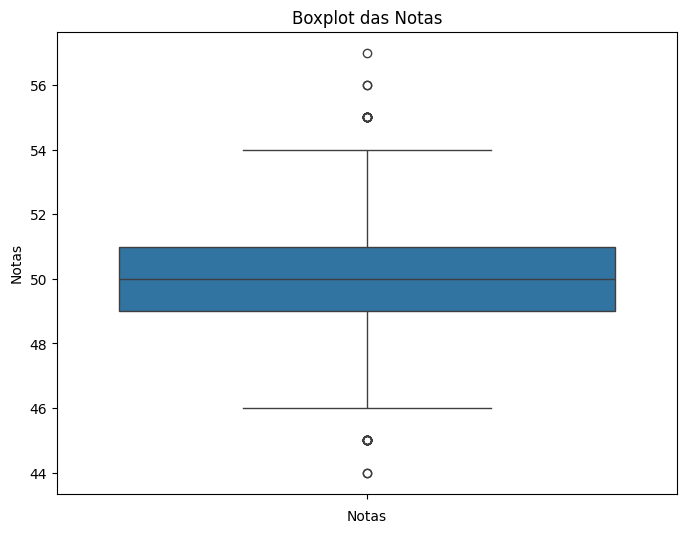

In [ ]:
alunos['Notas'] = np.round(np.random.normal(50, 2, 1000))
#display(alunos)

import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot para análise de outliers
plt.figure(figsize=(8, 6))
sns.boxplot(alunos['Notas'])
plt.title('Boxplot das Notas')
plt.xlabel('Notas')
plt.show()

**3. Histograma para Frequência**
- Desafio: Plote um histograma das idades dos alunos do DataFrame anterior,
dividindo as idades em intervalos (bins) apropriados.

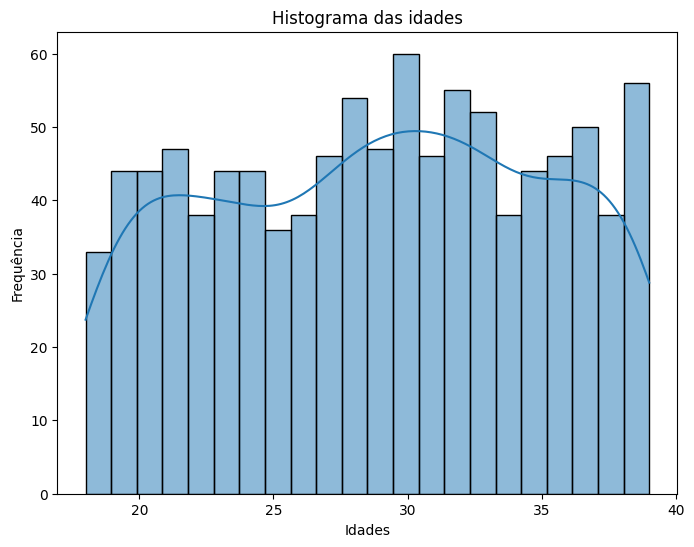

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(alunos['Idade'], bins=22, kde=True)
plt.title('Histograma das idades')
plt.xlabel('Idades')
plt.ylabel('Frequência')
plt.show()

**4. Cálculo de Covariância**
- Desafio: Adicione uma coluna &quot;Horas de Estudo&quot; ao DataFrame anterior. Calcule a
covariância entre &quot;Horas de Estudo&quot; e &quot;Nota&quot;.
- Objetivo: Compreender a relação entre duas variáveis.

In [ ]:
alunos['Horas de Estudo'] = np.random.randint(0, 20, 1000)
#display(alunos)
covariancia = alunos[['Nota', 'Horas de Estudo']].cov()
print("Covariância entre Nota e Horas de Estudo:")
print(covariancia)

Covariância entre Nota e Horas de Estudo:
                     Nota  Horas de Estudo
Nota             3.856736        -0.178723
Horas de Estudo -0.178723        32.542527


**5. Regressão Linear Simples**
- Desafio: Com base nas colunas &quot;Horas de Estudo&quot; e &quot;Nota&quot;, ajuste um modelo de
regressão linear simples. Plote a linha de regressão junto com os dados.
- Objetivo: Aprender sobre modelagem e previsão com regressão.

Coeficiente angular: -0.005491974403924686, Intercepto: 5.0631957247349


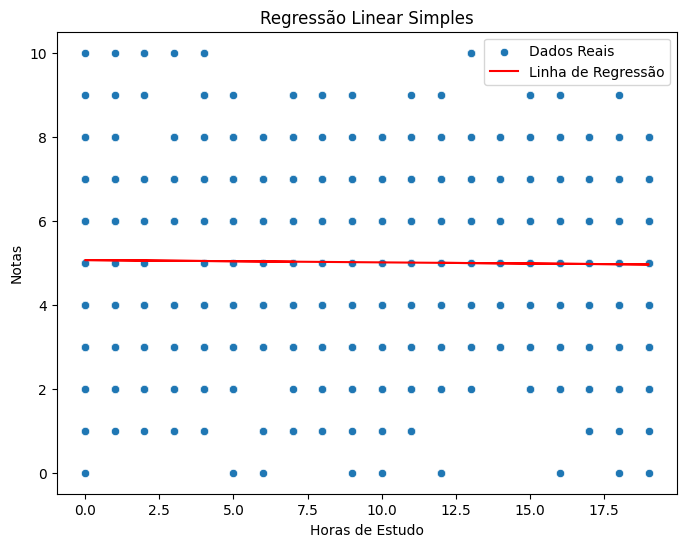

In [ ]:
from sklearn.linear_model import LinearRegression

X = alunos[['Horas de Estudo']]  # Variável independente
y = alunos['Nota']    # Variável dependente

# Criando o modelo de regressão
modelo = LinearRegression()
modelo.fit(X, y)

# Coeficientes
print(f"Coeficiente angular: {modelo.coef_[0]}, Intercepto: {modelo.intercept_}")

# Predições
alunos['Notas_Preditas'] = modelo.predict(X)

# Gráfico
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Horas de Estudo', y='Nota', data=alunos, label='Dados Reais')
plt.plot(alunos['Horas de Estudo'], alunos['Notas_Preditas'], color='red', label='Linha de Regressão')
plt.title('Regressão Linear Simples')
plt.xlabel('Horas de Estudo')
plt.ylabel('Notas')
plt.legend()
plt.show()

**6. Teste Qui-Quadrado**

- Desafio: Crie um DataFrame com a preferência de cursos (por exemplo,
&quot;Matemática&quot;, &quot;Física&quot;, &quot;Química&quot;) entre alunos de diferentes idades. Realize um teste
qui-quadrado para verificar se há associação entre a idade e a preferência de curso.
- Objetivo: Aplicar o teste qui-quadrado para dados categóricos.

In [ ]:
cursos = pd.DataFrame({
    'ID': range(1,1001),
    'Idade': np.random.randint(18, 30, 1000),
    'Cursos': np.random.choice(['Matemática', 'Física', 'Química', 'Farmácia', 'Engenharia', 'Biologia', 'Psicologia', 'Direito', 'Design'], 1000)
})

#display(cursos)

In [ ]:
from scipy import stats
# Criando a tabela de contingência entre Loja e Plataforma
contingencia = pd.crosstab(cursos['Idade'], cursos['Cursos'])

# Realizando o teste Qui-Quadrado
chi2, p, dof, expected = stats.chi2_contingency(contingencia)

print(f"Qui-Quadrado: {chi2}")
print(f"p-value: {p}")
print(f"Graus de Liberdade: {dof}")


Qui-Quadrado: 83.43437920254226
p-value: 0.6178297311630363
Graus de Liberdade: 88


**7. K-Means para Agrupamento**
- Desafio: Geração de um conjunto de dados com características de clientes (por
exemplo, &quot;Renda&quot; e &quot;Gastos&quot;). Aplique o algoritmo K-Means para agrupar os clientes e
visualize os grupos.
- Objetivo: Entender a técnica de agrupamento e suas aplicações.

In [ ]:
clientes = pd.DataFrame({
    'ID': range(1,1001),
    'Idade': np.random.randint(18, 80, 1000),
    'Renda': np.random.randint(2500, 15000, 1000),
    'Gastos': np.round(np.random.normal(1000, 100, 1000))
})
display(clientes)

,ID,Idade,Renda,Gastos
0,1,24,10090,1049.0
1,2,54,9138,1297.0
2,3,70,11940,1055.0
3,4,54,11262,1112.0
4,5,37,2981,991.0
...,...,...,...,...
995,996,67,14688,1096.0
996,997,41,6706,881.0
997,998,60,6178,921.0
998,999,32,14058,949.0


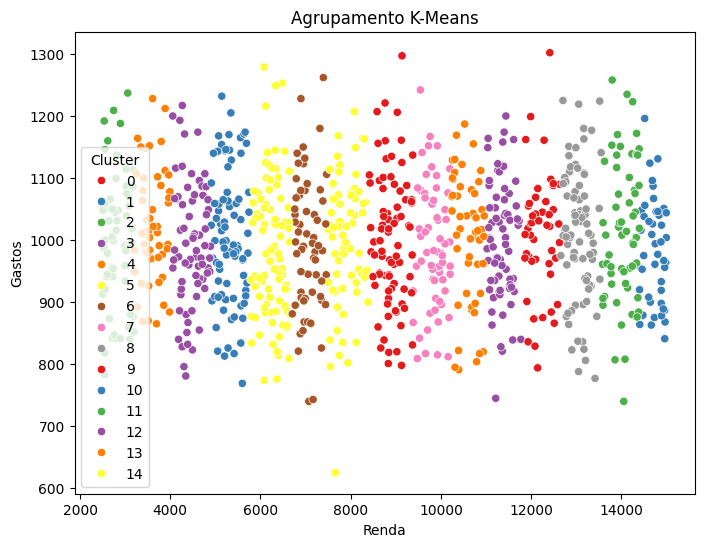

In [ ]:
from sklearn.cluster import KMeans

# Selecionando as variáveis para agrupamento
X = clientes[['Renda', 'Gastos']]

# Criando o modelo K-Means
kmeans = KMeans(n_clusters=15, random_state=1)
clientes['Cluster'] = kmeans.fit_predict(X)

# Gráfico de dispersão com agrupamento
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Renda', y='Gastos', hue='Cluster', data=clientes, palette='Set1')
plt.title('Agrupamento K-Means')
plt.xlabel('Renda')
plt.ylabel('Gastos')
plt.legend(title='Cluster')
plt.show()

**8. Análise de Componentes Principais (PCA)**
- Desafio: Use um conjunto de dados multivariados (como o conjunto de dados Iris).
Aplique PCA e visualize os primeiros dois componentes principais.
- Objetivo: Reduzir a dimensionalidade dos dados e explorar suas variáveis.

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
dados = pd.DataFrame(iris.data, columns=iris.feature_names)
dados['species'] = iris.target
display(dados)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = iris.data

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

dados_pca = pd.DataFrame(data = X_pca, columns=['Principal Componente 1', 'Principal Componente 2'])

dados_pca['species'] = iris.target

display(dados_pca)



,Principal Componente 1,Principal Componente 2,species
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0
...,...,...,...
145,1.944110,0.187532,2
146,1.527167,-0.375317,2
147,1.764346,0.078859,2
148,1.900942,0.116628,2


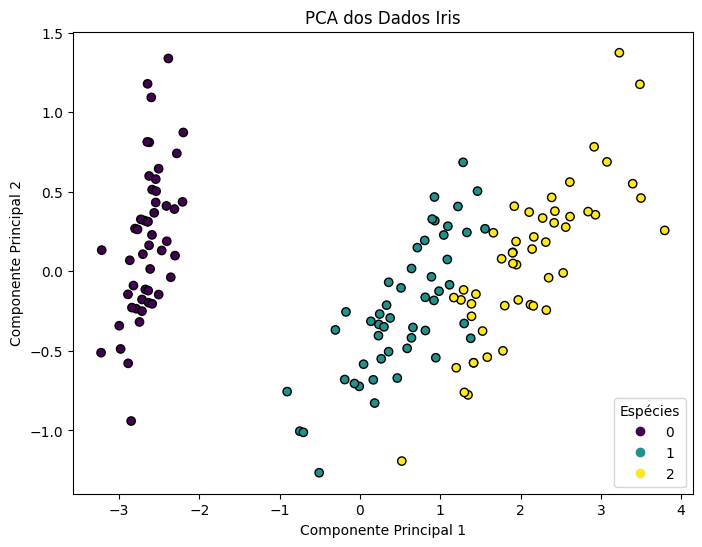

In [ ]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(dados_pca['Principal Componente 1'], dados_pca['Principal Componente 2'], c=dados_pca['species'], cmap='viridis', edgecolor='k')

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA dos Dados Iris')

plt.legend(*scatter.legend_elements(), title="Espécies")
plt.show()

**9. Distribuição Binomial**
- Desafio: Simule uma situação em que você realiza 10 tentativas de um experimento
com uma probabilidade de sucesso de 0,3. Calcule e visualize a distribuição binomial
para 0 a 10 sucessos.
- Objetivo: Entender e aplicar a distribuição binomial.

[2.82475249e-02 1.21060821e-01 2.33474441e-01 2.66827932e-01
 2.00120949e-01 1.02919345e-01 3.67569090e-02 9.00169200e-03
 1.44670050e-03 1.37781000e-04 5.90490000e-06]


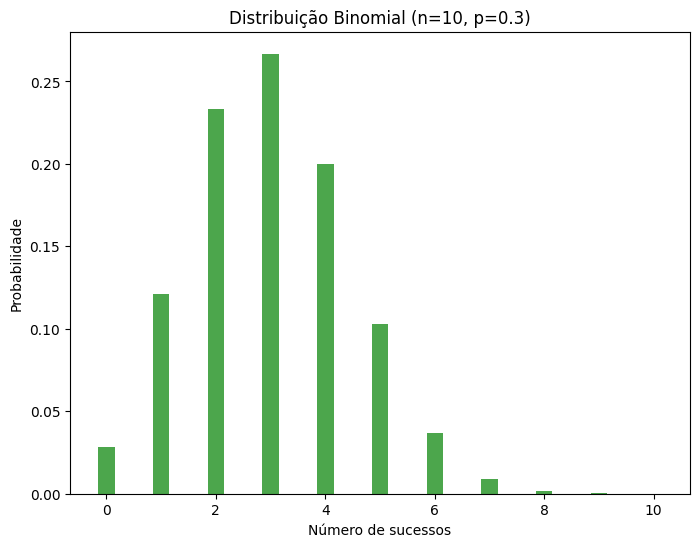

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

n = 10 # número de tnativas
p = 0.3 # probabilidade
num_sucesso = np.arange(0, n+1) #número de sucessos

probabilidades = binom.pmf(num_sucesso, n, p) # gerar valores binomiais

print(probabilidades)

plt.figure(figsize=(8,6))
plt.bar(num_sucesso, probabilidades, width=0.3, color='g', alpha=0.7)
plt.xlabel('Número de sucessos')
plt.ylabel('Probabilidade')
plt.title(f'Distribuição Binomial (n={n}, p={p})')
plt.show()

**10. Análise de Séries Temporais**
- Desafio: Crie uma série temporal simulada de vendas mensais de um produto ao
longo de dois anos. Plote os dados e analise a tendência.
- Objetivo: Aprender a manipular e analisar dados de séries temporais.

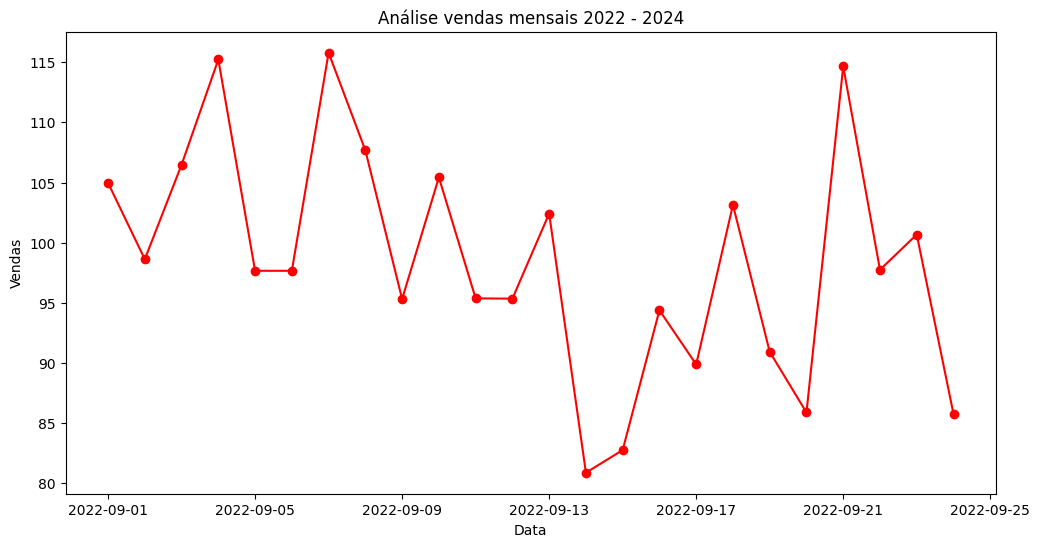

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

np.random.seed(42)

# Simulando dados de séries temporais
date_range = pd.date_range(start='2022-09-01', periods=24) #24 quantidade de meses
vendas = np.random.normal(100, 10, 24)
serie_temporal = pd.DataFrame({'Data': date_range, 'Vendas': vendas})
serie_temporal.set_index('Data', inplace=True)

# Gráfico da série temporal
plt.figure(figsize=(12, 6))
plt.plot(serie_temporal.index, serie_temporal['Vendas'], marker = 'o', color='red')
plt.title('Análise vendas mensais 2022 - 2024')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.show()